# Predicting Student Gender Using Exam Scores

In ideal educational settings, the ability to indicate whether there are gender differences in exam performance across different subjects should guide curriculum development and teaching methods. This dataset contains details of exam scores secured by students in a US high school and will be used to explore whether performance in separate subjects could predict an examinee's gender. The original dataset can be found [here](https://www.kaggle.com/spscientist/students-performance-in-exams).

The following columns are described for 1000 students:

- gender
- race/ethnicity
- parental level of education
- lunch
- test preparation course
- math score
- reading score
- writing score

# Explore the Dataset

Import libraries for dataframe manipulation and graphing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the dataset.

In [2]:
students = pd.read_csv('StudentsPerformance.csv')

Check that the columns of the dataset have been correctly imported.

In [3]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Check the number of entries and data types in the dataset.

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Provide descriptive statistics for the numerical features.

In [5]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


List unique Gender categories

In [6]:
students.gender.nunique()

2

List number of unique values in each column, grouped by Gender

In [7]:
students.groupby('gender').nunique()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,,
female,1,5,6,2,2,79,67,69
male,1,5,6,2,2,68,65,67


Visualise Gender count

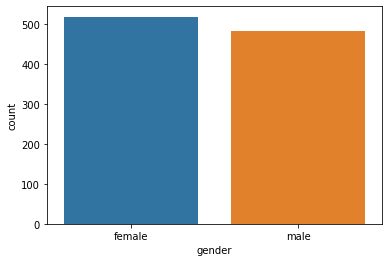

In [8]:
sns.countplot(x='gender', data=students)

List number of unique races

In [9]:
students['race/ethnicity'].nunique()

5

List labels of unique races.

In [10]:
students['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

Count number of individuals listed under each race.

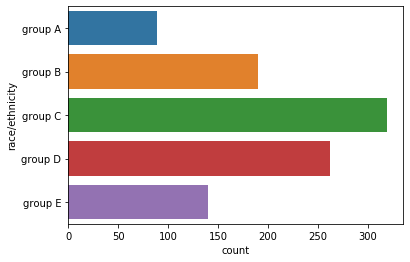

In [11]:
sns.countplot(y='race/ethnicity', order=['group A','group B','group C','group D','group E'], data=students)

List number of unique labels in parental level of education.

In [12]:
students['parental level of education'].nunique()

6

List labels in parental level of education.

In [13]:
students['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Count number of individuals listed under each level of parental education.

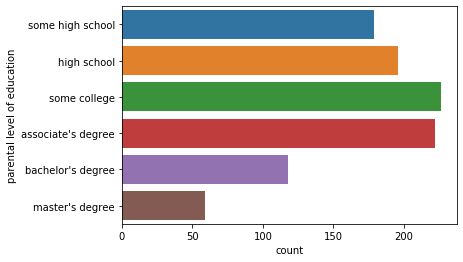

In [14]:
sns.countplot(y='parental level of education', order=["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"], data=students)

List number of unique labels for the lunch category.

In [15]:
students['lunch'].nunique()

2

List labels for the lunch category.

In [16]:
students['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Count the number of individuals under each lunch category

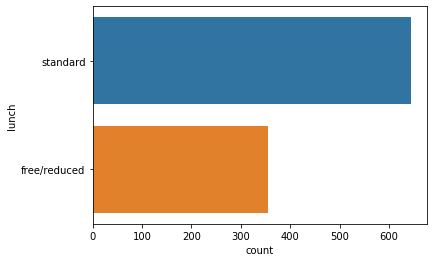

In [17]:
sns.countplot(y='lunch', data=students)

List the number of unique values in the test preparation column.

In [18]:
students['test preparation course'].nunique()

2

List the labels under the test preparation column.

In [19]:
students['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

Count the number of individuals under each label of the test preparation course column

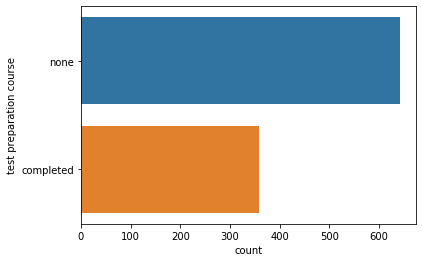

In [20]:
sns.countplot(y='test preparation course', data=students)

Display a boxplot for maths scores organised by different categories of parental level of education and split by gender.

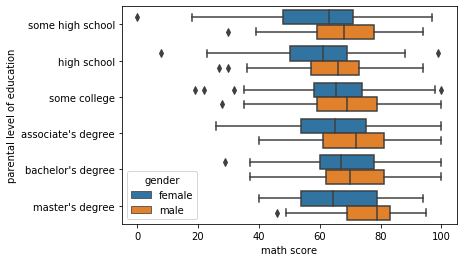

In [21]:
sns.boxplot(y="parental level of education", x="math score", hue='gender', order=["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"], data=students)

Display a boxplot for reading scores organised by different categories of parental level of education and split by gender.

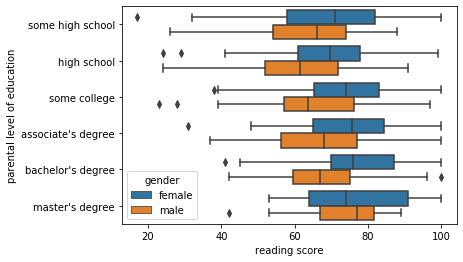

In [22]:
sns.boxplot(y="parental level of education", x="reading score", hue='gender', order=["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"], data=students)

Display a boxplot for writing scores organised by different categories of parental level of education and split by gender.

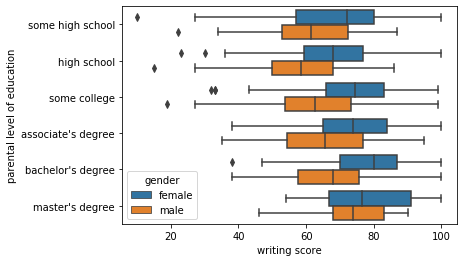

In [23]:
sns.boxplot(y="parental level of education", x="writing score", hue='gender', order=["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"], data=students)

Display a pairplot for reading, writing, and maths scores.

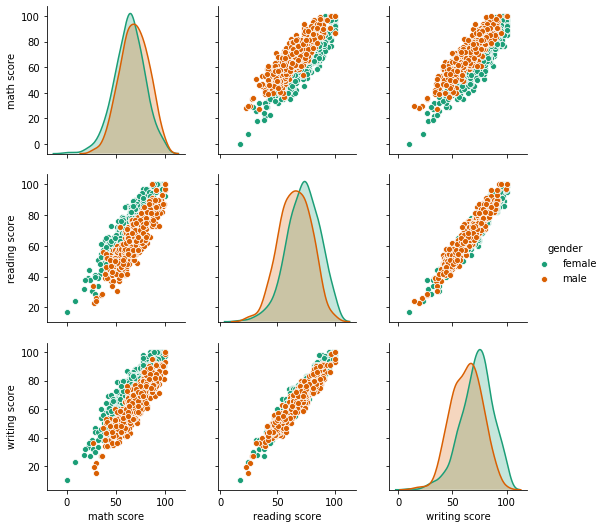

In [24]:
sns.pairplot(students,hue='gender',palette='Dark2')

# Train Test Split

Since Support Vector Machines can handle separation between categorical classes with high dimensional data, we will attempt to predict student gender using Support Vector Classification. First, split your data into a training set and a testing set.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Define features used for prediction and assign gender as the predicted variable.

In [27]:
X = students.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
y = students['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [28]:
from sklearn.svm import SVC

Make sure to select gamma='scale' to scale your features. This should improve model performance.

In [29]:
svc_model = SVC(gamma='scale')

In [30]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [31]:
predictions = svc_model.predict(X_test)

To generate a classification report and confusion matrix, we import sklearn.metrics.

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,predictions))

[[130  11]
 [ 23 136]]


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      female       0.85      0.92      0.88       141
        male       0.93      0.86      0.89       159

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# Gridsearch for improving model parameters

We can set some parameters for C and gamma to determine which combination gives as the best results.
- Remember that higher C values reduce misclassification.
- The gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. (From SciKit Learn documentation.)

** Import GridsearchCV from SciKit Learn.**

In [35]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [36]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

Create a GridSearchCV object and fit it to the training data. Set the number of cross-validation folds. 5 folds mean indicate that 20% of the data will be used for testing purposes.

In [37]:
grid = GridSearchCV(SVC(),param_grid,cv=5,refit=True,verbose=2) # cv means number of cross-validation folds
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Check for improvements.

In [38]:
grid_predictions = grid.predict(X_test)

In [39]:
print(confusion_matrix(y_test,grid_predictions))

[[130  11]
 [ 27 132]]


In [40]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      female       0.83      0.92      0.87       141
        male       0.92      0.83      0.87       159

    accuracy                           0.87       300
   macro avg       0.88      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300



Grid Search did not necessarily improve our model performance but our original ability to classify student gender based on exam performance was quite high. This is just an example of the kind of predictions that can be performed using the same dataset. Other student attributes could be used in conjunction with test-scores to investigate gender differences in educational outcomes.